In [33]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 5 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (4,293 kB/s)
debconf: unable to initia

In [22]:
!sudo apt-get install qt5-default

Reading package lists... Done
Building dependency tree       
Reading state information... Done
qt5-default is already the newest version (5.9.5+dfsg-0ubuntu2.6).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 5 not upgraded.


In [36]:
import cv2
import os
import sys
import pytesseract
import numpy as np
from PIL import Image
from pytesseract import pytesseract
from google.colab.patches import cv2_imshow

In [35]:

path_for_dataSet = os.path.join(os.getcwd(), 'ImageDataset')

images_array = os.listdir(path_for_dataSet)
if(not os.path.isdir('output')):
    os.mkdir('output')
path_for_output = os.path.join(os.getcwd(), 'Output')

In [27]:

def image_read(imagePath):
    image = cv2.imread(imagePath)
    return image

def convertImg2Grayscale(img):
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def remove_noise(img):
    return cv2.bilateralFilter(img, 10, 85, 85)

def equalization_histogram(img):
    return cv2.equalizeHist(img)

def morphological_opening(img, stct_element):
    return cv2.morphologyEx(img, cv2.MORPH_OPEN, stct_element, iterations=16)

def remove_histogram_equalization(hist_equa_Img, morph_img):
    return cv2.subtract(hist_equa_Img, morph_img)

def protect_Img(img):
    r, protectImage = cv2.threshold(img, 0, 255, cv2.THRESH_OTSU)
    return protectImage

def edge_detection(image, portal1, portal2):
    cany_img = cv2.Canny(image, portal1, portal2)
    cany_img = cv2.convertScaleAbs(cany_img)
    return cany_img

def image_Edge_Dilation(img, strct_element):
    return cv2.dilate(img, strct_element, iterations=1)

def finding_Contours(img):
    counter, image = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    return counter



In [28]:
def approx_Contors(contors):
    approx_polygn = None
    for contor in contors:
        contor_perimtr = cv2.arcLength(contor, True)
        approx_polygn = cv2.approxPolyDP(contor, 0.05*contor_perimtr, closed=True) #0.06
        # Quadrilateral Found
        if(len(approx_polygn) == 4): 
            break
    return approx_polygn

In [39]:
def create_Localized_NumberPlate(img, approx_polygn):
    moment =cv2.moments(approx_polygn)
    mX=int(moment['m10'] / moment['m00'])
    mY=int(moment['m01'] / moment['m00'])
    
    final_output_img = cv2.drawContours(img, [approx_polygn], -2, (1, 256, 1), 2) # -1 0 255 0 3
    
    cv2.circle(final_output_img, (mX, mY), 8, (1, 254, 1), -2)  # 7 0 255 0 -1
    #cv2.putText(final_output_img, 'Plates center of gravity: ('+str(mX)+', '+str(mY)+')', (54,54), cv2.FONT_HERSHEY_SIMPLEX, 2, (1, 254, 1), 3) # 1 0 255 0 2
    
    return final_output_img

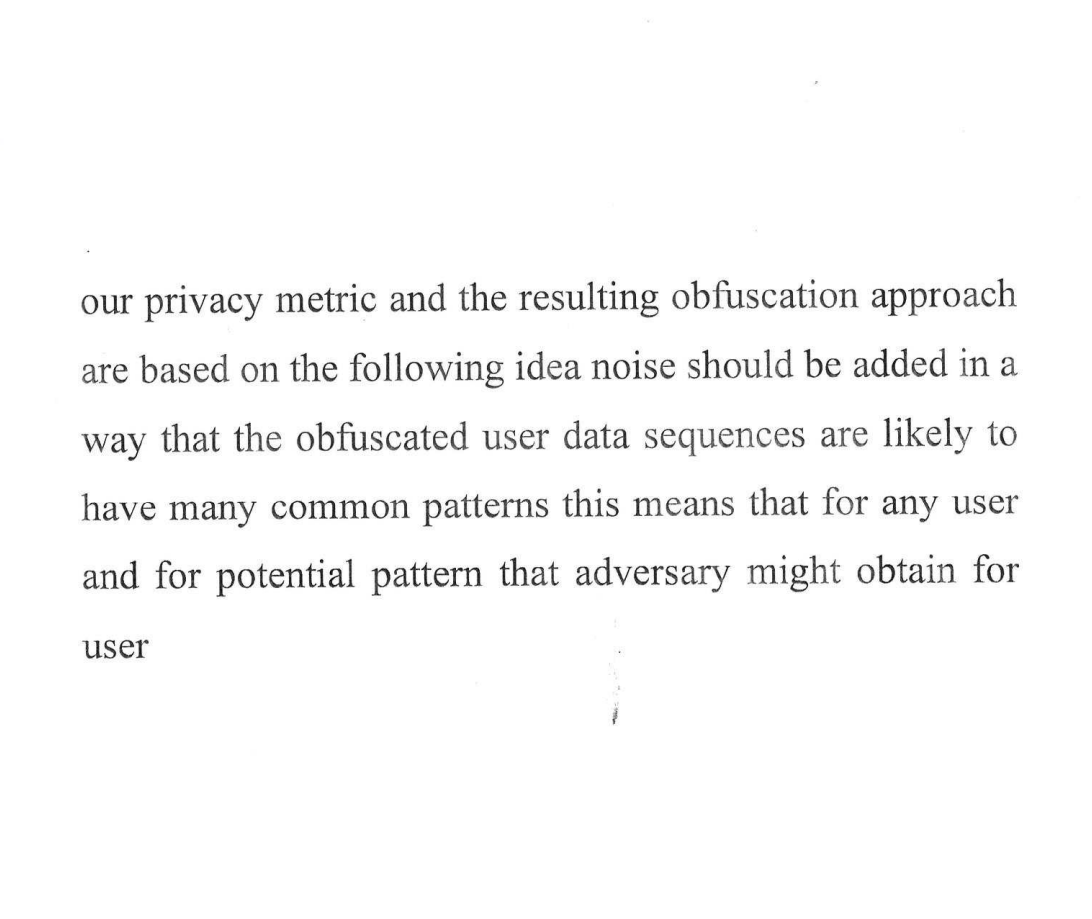

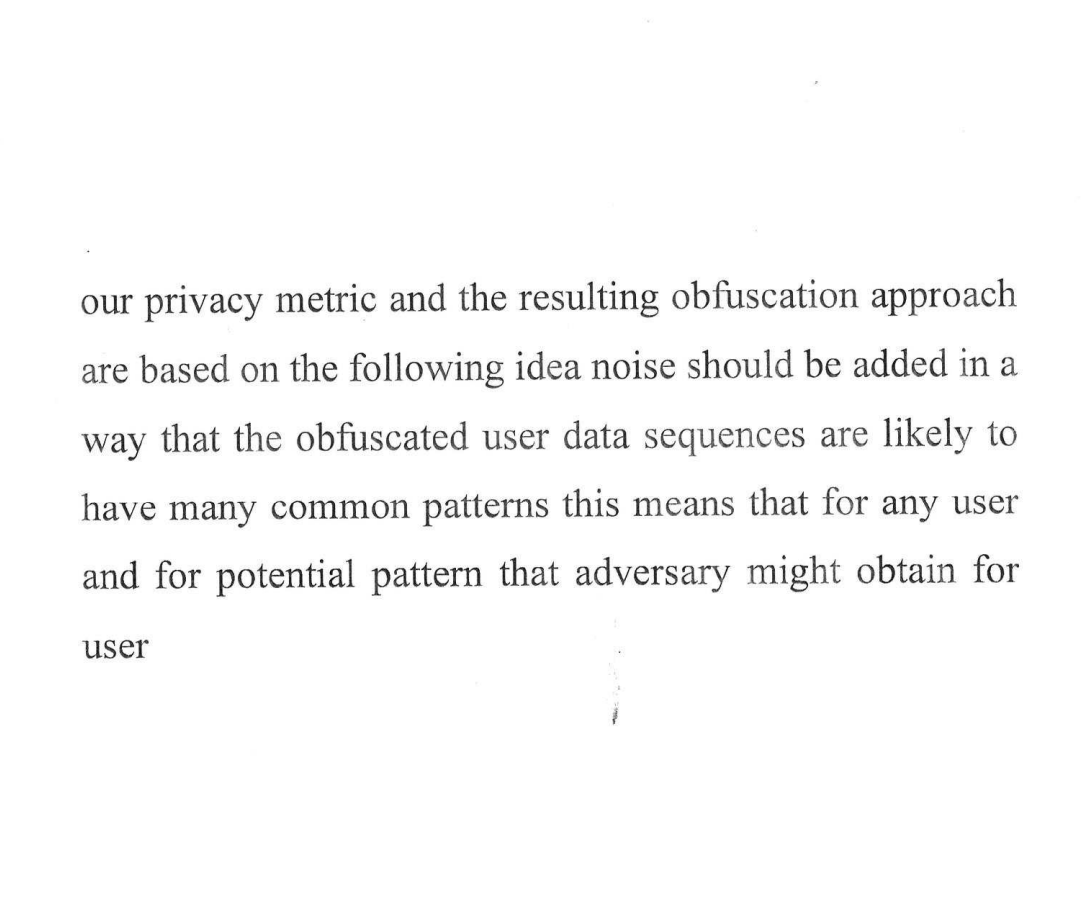

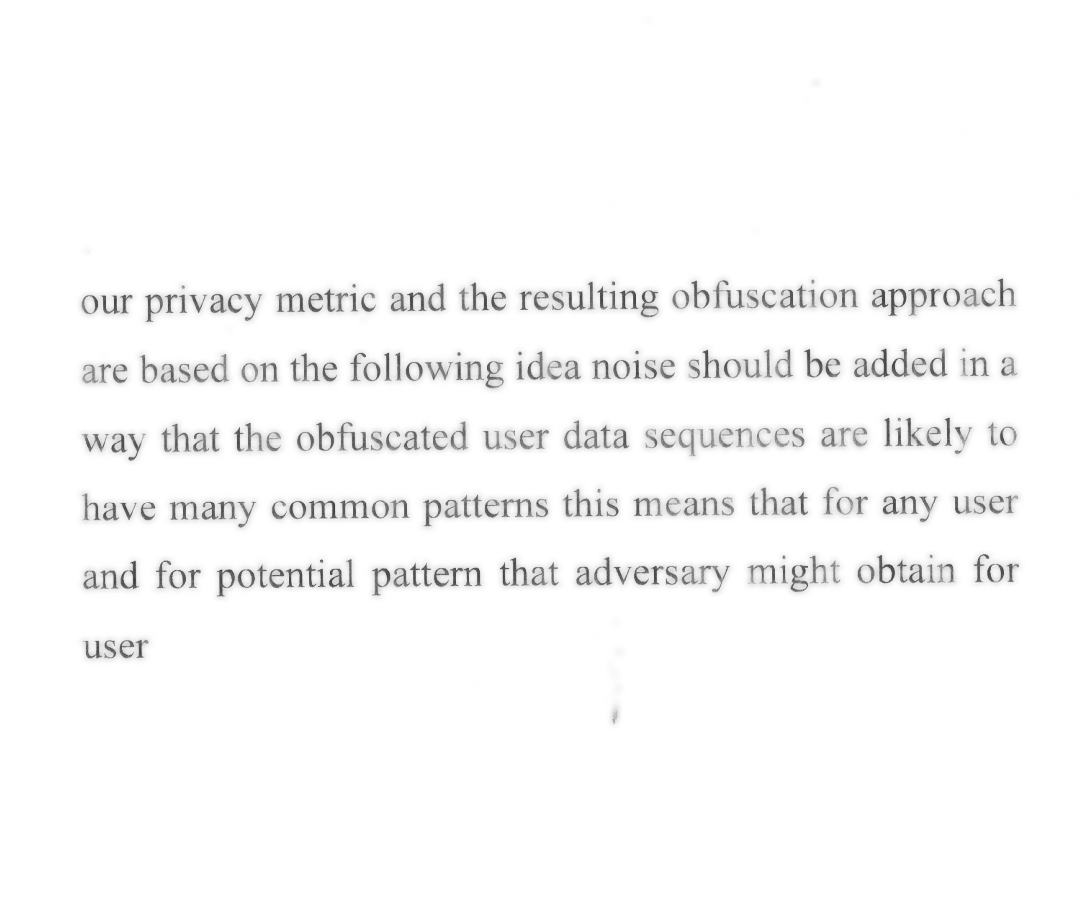

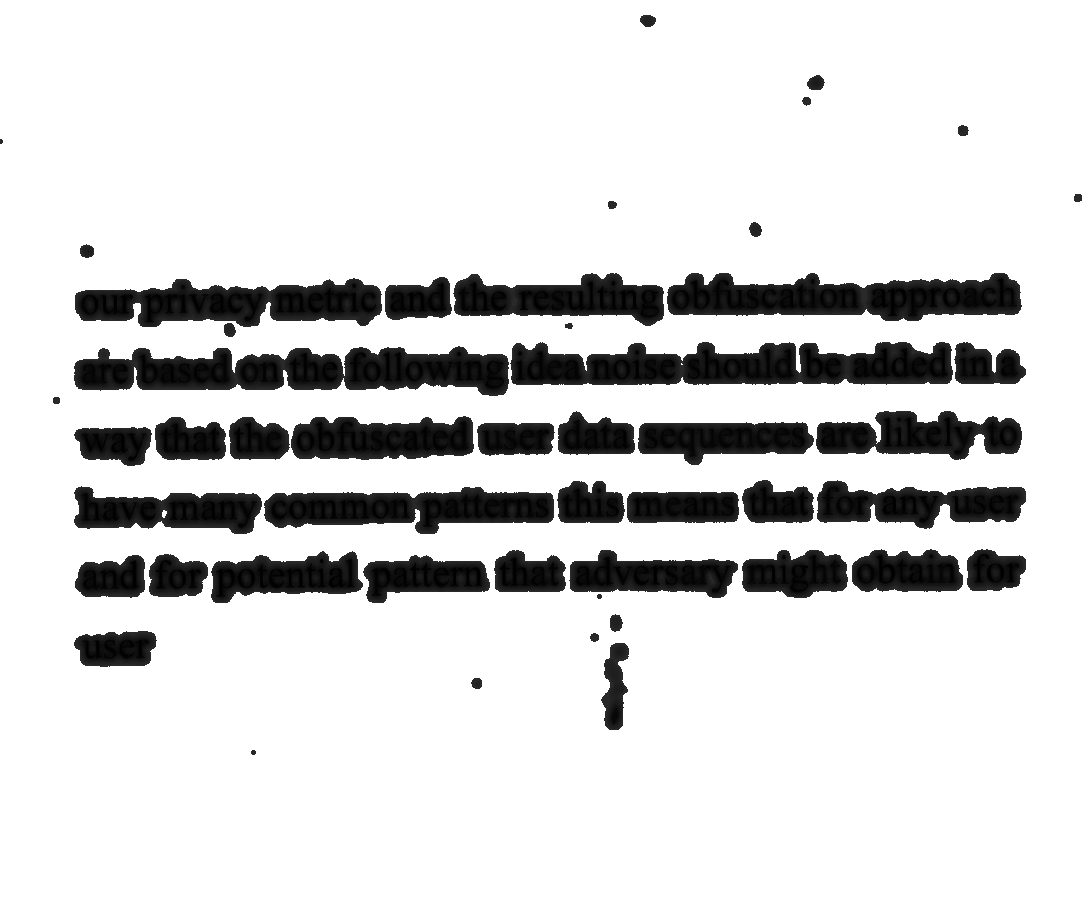

Dilated Edge Image


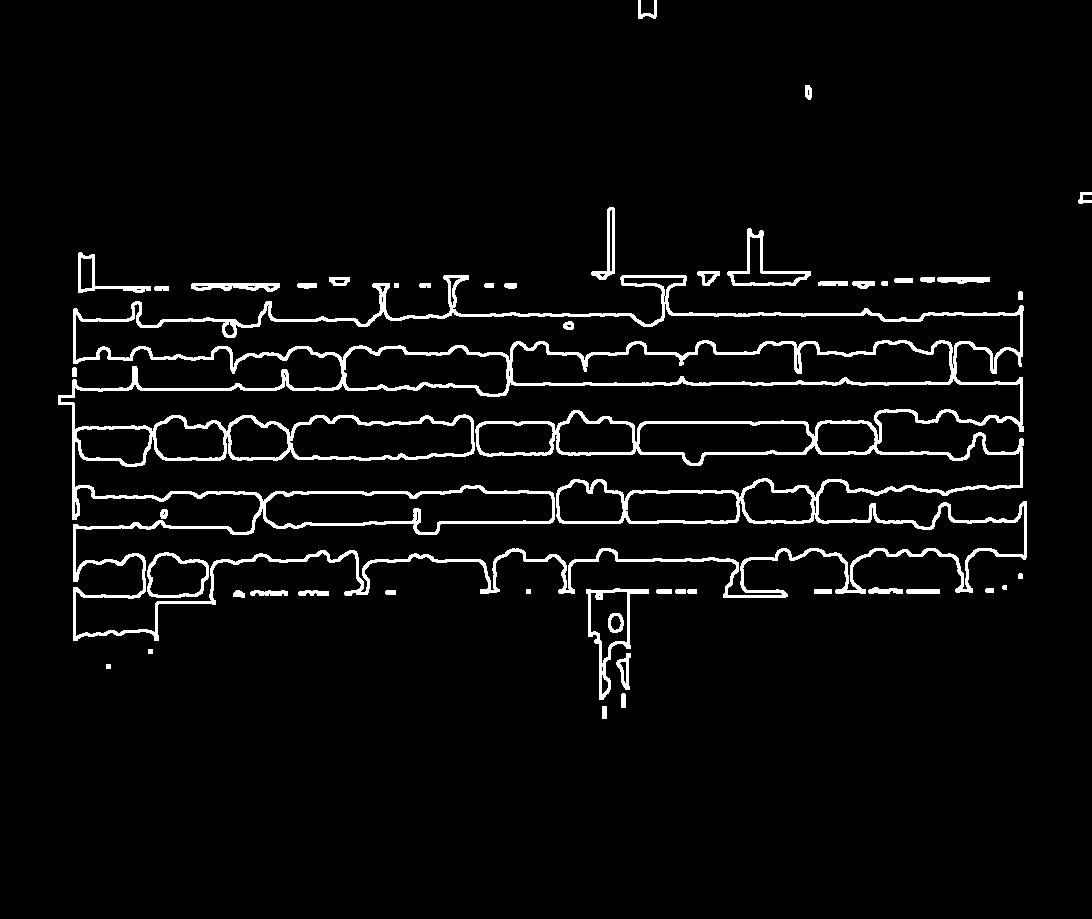

finalImage
[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


In [40]:

imagePath = os.path.join(path_for_dataSet, '/content/ImageDataset/5.png')
initialImage = image_read(imagePath)
cv2_imshow(initialImage)

grayscaleImage = convertImg2Grayscale(initialImage)

cv2_imshow(grayscaleImage)

noiseRemovedImage = remove_noise(grayscaleImage)

cv2_imshow(noiseRemovedImage)

histEqImage = equalization_histogram(noiseRemovedImage)

cv2_imshow(histEqImage)

openingStructElem = cv2.getStructuringElement(cv2.MORPH_RECT, (5, 5))

openedImage = morphological_opening(histEqImage, openingStructElem)

subtractedImage = remove_histogram_equalization(histEqImage, openedImage)

threshImage = protect_Img(subtractedImage)

edgeDetectedImage = edge_detection(threshImage, 250, 255)

dilationStructElem = np.ones((3, 3), np.uint8)

dilatedImage = image_Edge_Dilation(edgeDetectedImage, dilationStructElem)
print("Dilated Edge Image")
cv2_imshow(dilatedImage)

contours = finding_Contours(dilatedImage)
approximatedPolygon = approx_Contors(contours)

finalImage = create_Localized_NumberPlate(initialImage, approximatedPolygon)
print("finalImage")
print(finalImage)

In [41]:
cv2.imwrite('/content/finalImage.png',finalImage)

True

In [42]:
# path for image from google drive
image_path = "/content/finalImage.png"

# extracting text from the image using image_to_string() function
text = pytesseract.image_to_string(image_path)
  
# print extracted text
print(text)

our privacy metric and the resulting obfuscation approach
are based on the following idea noise should be added in a
way that the obfuscated user data sequences are likely to
have many common patterns this means that for any user
and for potential pattern that adversary might obtain for
user

eo

